# POLYNOMIAL REGRESSION





**Importing Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

**Creating Sample Data Set**  [X = input features, y = output variable]

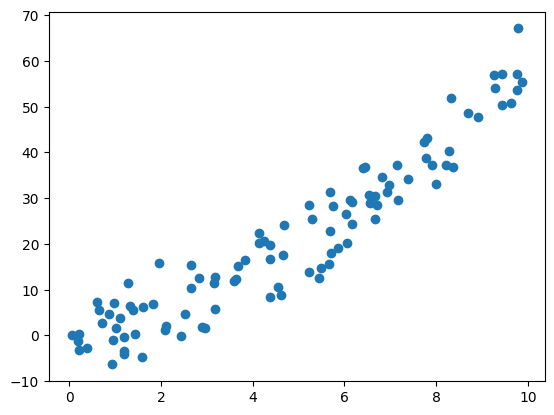

In [ ]:
np.random.seed(0)
X = np.random.rand(100, 1) * 10                     # 100 random points in range [0, 10]
y = 0.5 * X**2 + X + np.random.randn(100, 1) * 5     # Quadratic relation with noise
plt.scatter(X,y)
plt.show()


**Splitting the data into training and testing sets.**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Transforming the data to include polynomial features**

In [ ]:
poly = PolynomialFeatures(degree=2)  # Change degree for higher polynomials
X_poly = poly.fit_transform(X_train)

**Fitting the model**

In [ ]:
model = LinearRegression()
model.fit(X_poly, y_train)

LinearRegression()

**Make Predictions**







In [ ]:
X_poly_test = poly.transform(X_test)
y_pred = model.predict(X_poly_test)

**Visualise the Results**

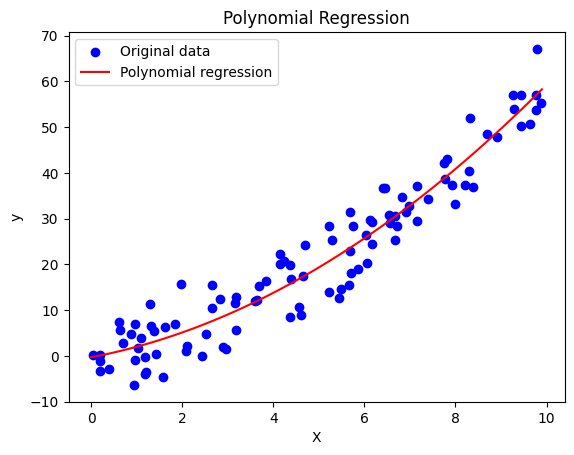

In [ ]:
plt.scatter(X, y, color='blue', label='Original data')
X_grid = np.arange(0, 10, 0.1).reshape(-1, 1)  # For smooth curve
plt.plot(X_grid, model.predict(poly.transform(X_grid)), color='red', label='Polynomial regression')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

**Evaluate Model Performance**

You can use metrics such as Mean Squared Error (MSE) and R-squared to evaluate how well your model is performing.


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 22.79039965318747
R-squared: 0.8939177921166952


**`Visualize Residuals`**

Plotting the residuals can help you check for patterns that may indicate a problem with your model.

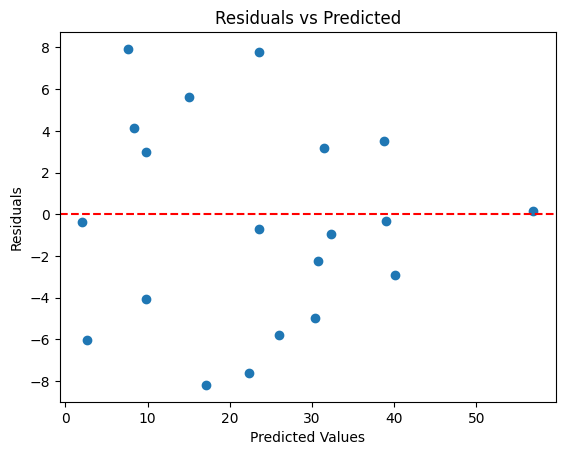

In [ ]:
# Residuals
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


**Try Different Polynomial Degrees**

Experiment with different polynomial degrees to see how the model performance changes.

In [ ]:
for degree in [1, 2, 3, 4]:
      poly = PolynomialFeatures(degree=degree)
      X_poly = poly.fit_transform(X_train)
      model = LinearRegression()
      model.fit(X_poly, y_train)

      # Predictions
      X_poly_test = poly.transform(X_test)
      y_pred = model.predict(X_poly_test)

      mse = mean_squared_error(y_test, y_pred)
      r2 = r2_score(y_test, y_pred)

      print(f'Degree: {degree} | MSE: {mse} | R-squared: {r2}')


Degree: 1 | MSE: 31.629210678996014 | R-squared: 0.8527758813582356
Degree: 2 | MSE: 22.79039965318747 | R-squared: 0.8939177921166952
Degree: 3 | MSE: 22.713271306436607 | R-squared: 0.8942768005341968
Degree: 4 | MSE: 22.896984259007258 | R-squared: 0.8934216739931083


 **Regularization Techniques**

 To avoid overfitting, you might want to implement regularization techniques such as Ridge or Lasso regression.

In [ ]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_poly, y_train)
y_ridge_pred = ridge_model.predict(X_poly_test)

# Calculate MSE and R^2 for Ridge
ridge_mse = mean_squared_error(y_test, y_ridge_pred)
ridge_r2 = r2_score(y_test, y_ridge_pred)

print(f'Ridge Regression | MSE: {ridge_mse} | R-squared: {ridge_r2}')

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_poly, y_train)
y_lasso_pred = lasso_model.predict(X_poly_test)

# Calculate MSE and R^2 for Lasso
lasso_mse = mean_squared_error(y_test, y_lasso_pred)
lasso_r2 = r2_score(y_test, y_lasso_pred)

print(f'Lasso Regression | MSE: {lasso_mse} | R-squared: {lasso_r2}')


Ridge Regression | MSE: 22.935331611370337 | R-squared: 0.893243179018599
Lasso Regression | MSE: 23.98011144284977 | R-squared: 0.888380054502931


**Save the Model**

In [ ]:
import joblib

# Save the model
joblib.dump(model, 'polynomial_regression_model.pkl')


['polynomial_regression_model.pkl']

**Make Future Predictions**

In [ ]:
# Load the model
loaded_model = joblib.load('polynomial_regression_model.pkl')

# Example of new data points
new_data = np.array([[5], [7], [9]])
new_data_poly = poly.transform(new_data)
predictions = loaded_model.predict(new_data_poly)

print(predictions)
